In [1]:
%load_ext autoreload
%autoreload 2

import camp
import numpy as np

In [13]:
camp.utils.hello(0.0)

try :
    camp.utils.compute_mean([0.0, 1.0, 2.0, 3.0])
    print(f"Caught an assertion error: {e}")
except Exception as e:
    print(f"Caught an unexpected error: {e}")

Hello again one more time, 0.0!
Caught an unexpected error: All numbers must be non-zero.


In [1]:
print("Hello, Economics Code Camp!")
print(f"I'm running Python in a container!")

# Let's do some basic math
gdp_2020 = 21_427_700  # US GDP in millions of dollars
gdp_2021 = 23_315_080
growth_rate = (gdp_2021 - gdp_2020) / gdp_2020 * 100

print(f"US GDP growth rate 2020-2021: {growth_rate:.2f}%")

Hello, Economics Code Camp!
I'm running Python in a container!
US GDP growth rate 2020-2021: 8.81%


In [24]:
np.random.seed(0)
n = 1000
x = np.random.normal(0, 1, n)
camp.utils.compute_statistics(x)

{'variance': np.float64(0.9752096659781323),
 'skewness': np.float64(0.03385895323565712),
 'kurtosis': np.float64(-0.0467663244783294)}

In [7]:
import pyreadstat

# Replace with the path to your .dta file
df, meta = pyreadstat.read_dta("../data/data2.dta")

print(df.head())       # Pandas DataFrame with your data
print(meta.column_names)  # Metadata about columns
print(meta.file_label)    # Stata file label, if any


   person  seo    year    id    house  rent    util    food  fstmp  hours  \
0       3    0  1978.0  3273   5000.0   0.0   400.0  2080.0    0.0   2256   
1       8    0  1978.0  3324  40000.0   0.0  1230.0  4680.0    0.0   5000   
2       8    0  1979.0  3539  35000.0   0.0  1200.0  2860.0    0.0   2688   
3       8    0  1980.0    73  45000.0   0.0  1364.0  4030.0    0.0   3339   
4       8    0  1981.0   626  45000.0   0.0  1840.0  4680.0    0.0   2920   

   ...  unionj  unioni  truncy  trunca  race  educ  educ2  region      yb  \
0  ...       1       1     0.0     0.0   1.0   2.0    2.0     2.0  1947.0   
1  ...       0       0     0.0     0.0   1.0   1.0    1.0     3.0  1922.0   
2  ...       0       0     0.0     0.0   1.0   1.0    1.0     3.0  1922.0   
3  ...       0       0     0.0     0.0   1.0   1.0    1.0     3.0  1922.0   
4  ...       0       0     0.0     0.0   1.0   1.0    1.0     3.0  1922.0   

   help  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 52 

0.46166148618890734


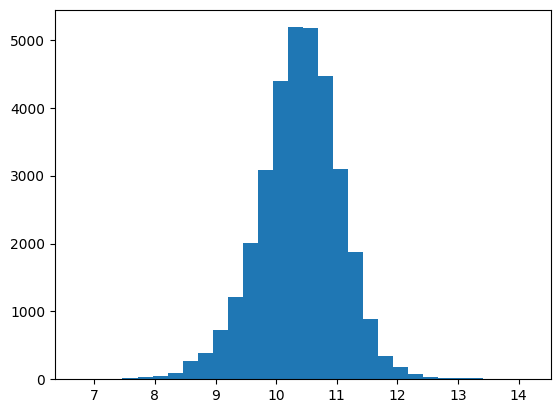

In [3]:
import numpy as np
import matplotlib.pyplot as plt
ly = [ np.log(y) for y in df.y if y > 0 ]
plt.hist(ly, bins=30)
print(np.var(ly))

In [8]:
id_col = "person"

# 1. Sort by person and year
df = df.sort_values([id_col, "year"])
df["ly"] = np.log(df["y"])
df = df.dropna(subset=["ly"])
df = df[ df["year"] <= 1992 ][ df["year"] >= 1980 ]

# 2. Compute growth (first difference of y within person)
df["dy"] = df.groupby(id_col)["ly"].diff()

# 3. Pivot so that rows = person, columns = year, values = dy
dy_wide = df.pivot(index=id_col, columns="year", values="dy")

# 4. Compute variance-covariance matrix across years
# pandas .cov() will automatically handle missing values pairwise
cov_matrix = dy_wide.cov()

print(cov_matrix)

year    1980.0    1981.0    1982.0    1983.0    1984.0    1985.0    1986.0  \
year                                                                         
1980.0     NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981.0     NaN  0.095837 -0.030640 -0.006725 -0.002321  0.003103 -0.004985   
1982.0     NaN -0.030640  0.093960 -0.019308 -0.006350 -0.001664  0.003312   
1983.0     NaN -0.006725 -0.019308  0.088550 -0.023846 -0.006893 -0.002116   
1984.0     NaN -0.002321 -0.006350 -0.023846  0.089634 -0.023921 -0.004972   
1985.0     NaN  0.003103 -0.001664 -0.006893 -0.023921  0.092565 -0.025094   
1986.0     NaN -0.004985  0.003312 -0.002116 -0.004972 -0.025094  0.095129   
1987.0     NaN  0.002700 -0.001407 -0.003653  0.001039 -0.002479 -0.026203   
1988.0     NaN -0.000582 -0.001682  0.001168 -0.000114 -0.005004 -0.010341   
1989.0     NaN -0.003682  0.000032  0.000941 -0.002984 -0.002691  0.002874   
1990.0     NaN  0.004734 -0.002927 -0.002479 -0.001815  0.001442

In [5]:
from scipy.stats import skew, kurtosis


print("Skewness and Kurtosis by Year (Levels):")
print("Year\t\tVar\t\tSkewness\tKurtosis")
print("-" * 60)

# Get unique years from df and sort them
unique_years = sorted(df['year'].unique())

for year in df['year'].unique():
    year_data = np.log(df[df['year'] == year]['y'].values)
    if len(year_data) > 0:  # Only compute if there's data for this year
        year_var = np.var(year_data)
        year_skew = skew(year_data)
        year_kurt = kurtosis(year_data)
        print(f"{int(year)}\t\t{year_var:.3f}\t\t{year_skew:.3f}\t\t{year_kurt:.3f}")


Skewness and Kurtosis by Year (Levels):
Year		Var		Skewness	Kurtosis
------------------------------------------------------------
1980		0.337		-0.191		1.339
1981		0.353		-0.338		1.299
1982		0.379		-0.432		1.250
1983		0.387		-0.471		1.158
1984		0.383		-0.410		1.878
1985		0.382		-0.389		1.329
1986		0.410		-0.300		1.008
1987		0.441		-0.514		2.667
1988		0.426		-0.342		1.991
1989		0.422		-0.353		1.713
1990		0.439		-0.419		1.350
1991		0.453		-0.414		1.406
1992		0.465		-0.418		1.269


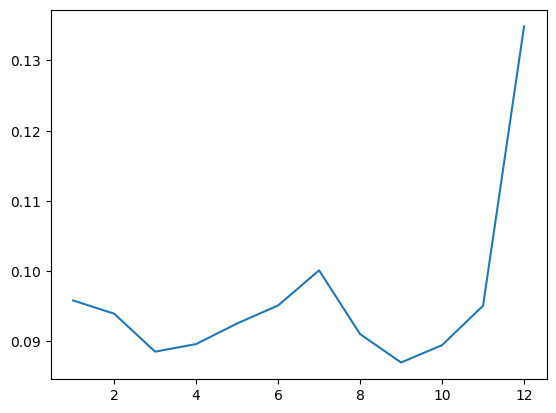

In [6]:
plt.plot(np.diag(cov_matrix))

In [ ]:
df[df['person'] == 2][['year', 'y', 'ly', 'dy']]b

,year,y,ly,dy
2045,1972.0,5179.0,8.552367,0.119861
9560,1973.0,5119.0,8.540714,-0.011653
96746,1974.0,6900.0,8.839277,0.298562
21184,1975.0,6161.0,8.725994,-0.113282
7264,1976.0,8135.0,9.003931,0.277937


In [26]:
dy_wide

year,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,...,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0
person,,,,,,,,,,,,,,,,,,,,,
2,NaN,0.119861,-0.011653,0.298562,-0.113282,0.277937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.149218,0.131006,0.278392,-0.116534,0.298855,0.098713,0.092595,0.127145,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.926762,-0.337514,0.047515,0.069457,-0.060219,NaN,NaN,NaN,1.107955,...,0.351454,-0.779198,0.860378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.633754,-0.518578,0.417214,0.545297,0.042223,-0.902779,-9.811372,9.681219,1.609038,-1.051155,...,0.394145,-0.216505,0.239728,-0.400676,0.058990,0.121951,-0.686766,0.400431,0.215533,-0.859548
9,NaN,NaN,NaN,0.497403,0.258198,0.403096,-0.009814,0.242952,0.146227,0.039771,...,0.087153,0.172667,-0.145403,0.158931,0.030717,-0.003600,-0.181939,0.192887,0.333912,-0.257149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18525,NaN,NaN,NaN,NaN,NaN,NaN,0.491677,0.150874,-0.121509,0.315288,...,0.218482,-0.047856,-0.151005,0.243245,-0.002291,0.126111,0.010998,-0.031749,0.306298,-0.170753
18527,0.181492,-0.030010,NaN,NaN,0.458040,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18530,0.009217,0.332533,-0.615699,0.091628,0.406206,NaN,-0.498321,0.084083,0.485783,0.504327,...,0.569892,0.109519,-0.006940,0.049089,-0.410950,0.705570,0.320472,-0.438255,0.154389,-1.919831


In [21]:
df

,person,seo,year,id,pid,house,rent,util,food,fstmp,...,asset,trhf,hhelp,ohelp,unionj,unioni,truncy,trunca,whelp,dy
40729,1,0,1968.0,1597,1,15000.0,0.0,350.0,988.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.731563
2713,2,0,1970.0,108,1,16000.0,0.0,350.0,780.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.106136
1131,2,0,1971.0,45,1,16000.0,0.0,385.0,520.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.140500
2045,2,0,1972.0,81,1,16000.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119861
9560,2,0,1973.0,378,1,20000.0,0.0,NaN,1040.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146020,18532,1,1988.0,6088,1,0.0,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,0,1,1,0.0,0.0,0.0,0.712039
40674,18532,1,1989.0,1594,1,0.0,3720.0,NaN,3120.0,2000.0,...,0.0,NaN,0.0,0,1,1,0.0,0.0,0.0,0.547295
110060,18532,1,1990.0,4356,1,0.0,3900.0,NaN,3640.0,0.0,...,0.0,NaN,0.0,0,1,1,0.0,0.0,0.0,0.279383
162198,18532,1,1991.0,8874,1,0.0,6600.0,NaN,720.0,3600.0,...,0.0,NaN,0.0,0,1,1,0.0,0.0,0.0,0.000000


In [8]:
id_col = "person"
df = camp.utils.simulate_panel_ar1(800, 6, 0.90, 0.2, 1.2)

# 2. Compute growth (first difference of y within person)
df["dy"] = df.groupby(id_col)["y"].diff()

# 3. Pivot so that rows = person, columns = year, values = dy
dy_wide = df.pivot(index=id_col, columns="year", values="dy")

# 4. Compute variance-covariance matrix across years
# pandas .cov() will automatically handle missing values pairwise
cov_matrix = dy_wide.cov()

print(cov_matrix)

results = camp.utils.estimate_panel_ar1_statsmodels(df)
print(results.summary())


year   0         1         2         3         4         5
year                                                      
0    NaN       NaN       NaN       NaN       NaN       NaN
1    NaN  0.214605 -0.011312  0.011093 -0.017035 -0.000373
2    NaN -0.011312  0.202269 -0.001032 -0.008044 -0.000523
3    NaN  0.011093 -0.001032  0.202659 -0.010373  0.000877
4    NaN -0.017035 -0.008044 -0.010373  0.216938 -0.015593
5    NaN -0.000373 -0.000523  0.000877 -0.015593  0.209975
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.820
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                          1.827e+04
Date:                Tue, 16 Sep 2025   Prob (F-statistic):                        0.00
Time:                        16:51:26   Log-Likelihood:                         -2437.4


# Permanent Transitory models


In [ ]:
import math
from dataclasses import dataclass
from typing import Optional, Dict

import torch
from torch import nn
from torch.optim import Adam


# ----------------------------
# 1) Simulator
# ----------------------------
@dataclass
class PTSimulatorConfig:
    N: int
    T: int
    rho: float
    sigma_e2: float
    sigma_u2: float
    sigma_p1_2: float
    sigma_alpha2: float = 0.0  # optional individual effect; drops out in Δy
    device: str = "cpu"
    dtype: torch.dtype = torch.float64
    seed: Optional[int] = None


class PTSimulator:
    """
    Simulates a Permanent-Transitory earnings model:
      y_it = alpha_i + p_it + e_it
      p_it = rho * p_i,t-1 + u_it
    where e_it ~ N(0, sigma_e2), u_it ~ N(0, sigma_u2), p_i1 ~ N(0, sigma_p1_2),
    alpha_i ~ N(0, sigma_alpha2) (optional).
    """
    def __init__(self, cfg: PTSimulatorConfig):
        self.cfg = cfg
        if cfg.seed is not None:
            torch.manual_seed(cfg.seed)

    def simulate(self) -> Dict[str, torch.Tensor]:
        N, T = self.cfg.N, self.cfg.T
        device, dtype = self.cfg.device, self.cfg.dtype
        rho = self.cfg.rho

        # Draw individual effects and initial permanent component
        alpha = torch.zeros(N, device=device, dtype=dtype)
        if self.cfg.sigma_alpha2 > 0:
            alpha = torch.randn(N, device=device, dtype=dtype) * math.sqrt(self.cfg.sigma_alpha2)

        p = torch.zeros((N, T), device=device, dtype=dtype)
        p[:, 0] = torch.randn(N, device=device, dtype=dtype) * math.sqrt(self.cfg.sigma_p1_2)
        if T > 1:
            u = torch.randn((N, T-1), device=device, dtype=dtype) * math.sqrt(self.cfg.sigma_u2)
            for t in range(1, T):
                p[:, t] = rho * p[:, t-1] + u[:, t-1]

        # Transitory shocks e_it
        e = torch.randn((N, T), device=device, dtype=dtype) * math.sqrt(self.cfg.sigma_e2)

        # Observed earnings
        y = alpha[:, None] + p + e

        return {"y": y, "p": p, "e": e, "alpha": alpha}


# ----------------------------
# 2) Moment-based PyTorch Estimator
# ----------------------------
class PTMomentEstimator(nn.Module):
    """
    Estimates (rho, sigma_e2, sigma_u2, sigma_p1_2) by minimizing the squared distance
    between sample and implied moments of Δy_it = y_it - y_i,t-1.

    Moments matched:
      - Var(Δy_t) for t = 2..T
      - Cov(Δy_t, Δy_{t-k}) for k = 1..K, valid t

    Implied moments are computed in closed form given (rho, sigma_e2, sigma_u2, sigma_p1_2),
    *without* assuming stationarity (σ_{p1}^2 is free).
    """
    def __init__(self, y: torch.Tensor, max_lag: int = 2, device: Optional[str] = None, dtype=torch.float64):
        """
        y: (N, T) earnings panel
        """
        super().__init__()
        assert y.ndim == 2
        self.register_buffer("y", y.to(dtype))
        self.N, self.T = y.shape
        self.max_lag = max_lag
        self.device_ = device or str(y.device)
        self.dtype_ = dtype

        # Build Δy and time masks once
        dy = y[:, 1:] - y[:, :-1]  # (N, T-1) for t=2..T
        self.register_buffer("dy", dy)

        # Sample moments (fixed targets, no grad)
        samp_var, samp_acov = self._sample_moments(dy, max_lag)
        self.register_buffer("target_var", samp_var)   # shape (T-1,)
        self.register_buffer("target_acov", samp_acov) # shape (max_lag, T-1), masked where invalid

        # Parameterization:
        #   rho = tanh(raw_rho) in (-1,1)
        #   variances via softplus to ensure positivity
        self.raw_rho = nn.Parameter(torch.tensor(0.2, dtype=dtype))  # init near 0.2
        self.raw_logvar_e = nn.Parameter(torch.tensor(math.log(0.1), dtype=dtype))
        self.raw_logvar_u = nn.Parameter(torch.tensor(math.log(0.1), dtype=dtype))
        self.raw_logvar_p1 = nn.Parameter(torch.tensor(math.log(0.1), dtype=dtype))

        # small epsilon for softplus
        self.softplus = nn.Softplus(beta=1.0)

    # ---- utilities ----
    @staticmethod
    def _sample_moments(dy: torch.Tensor, max_lag: int):
        """
        dy: (N, T1) with T1 = T-1 (t=2..T).
        Returns:
          samp_var: (T1,) variance across i at each t
          samp_acov: (max_lag, T1) auto-covariances; entries invalid for t<=k are set to 0,
                     but we will mask them in the loss.
        """
        N, T1 = dy.shape
        # Center across individuals at each t
        dy_centered = dy - dy.mean(dim=0, keepdim=True)
        samp_var = (dy_centered.pow(2).sum(dim=0) / (N - 1)).to(dy.dtype)  # unbiased

        # Auto-covariances at lags 1..K
        acov = torch.zeros((max_lag, T1), dtype=dy.dtype, device=dy.device)
        for k in range(1, max_lag + 1):
            # valid columns are t=k..T1-1 (0-indexed), i.e., indices k..T1-1
            t_idx = torch.arange(k, T1, device=dy.device)
            if len(t_idx) == 0:
                continue
            x = dy_centered[:, t_idx]
            ylag = dy_centered[:, t_idx - k]
            acov_k = (x * ylag).sum(dim=0) / (N - 1)
            acov[k - 1, t_idx] = acov_k
        return samp_var, acov

    def _params(self):
        rho = torch.tanh(self.raw_rho)
        sigma_e2 = self.softplus(self.raw_logvar_e)
        sigma_u2 = self.softplus(self.raw_logvar_u)
        sigma_p1_2 = self.softplus(self.raw_logvar_p1)
        return rho, sigma_e2, sigma_u2, sigma_p1_2

    def implied_moments(self):
        """
        Compute implied Var(Δy_t) and Cov(Δy_t, Δy_{t-k}) for t=2..T, k=1..K.

        Strategy:
          1) Build Var/Cov of p_t recursively given (rho, sigma_u2, sigma_p1_2):
             Var(p_t) = rho^2 Var(p_{t-1}) + sigma_u2, Cov(p_t, p_s) = rho^{t-s} Var(p_s) for t>=s.
          2) Form Δp_t = p_t - p_{t-1} for t=2..T, then
             Cov(Δp_t, Δp_s) = Cov(p_t, p_s) - Cov(p_t, p_{s-1}) - Cov(p_{t-1}, p_s) + Cov(p_{t-1}, p_{s-1}).
          3) Add the transitory part: Δe_t = e_t - e_{t-1} → Cov(Δe_t, Δe_s) =
                2σ_e^2 if t=s; -σ_e^2 if |t-s|=1; 0 otherwise.
        """
        rho, sigma_e2, sigma_u2, sigma_p1_2 = self._params()
        T = self.T
        T1 = T - 1  # number of Δy columns (t=2..T)

        # 1) Var/Cov for p_t at times 1..T
        var_p = torch.zeros(T, dtype=self.dtype_, device=self.device_)
        var_p[0] = sigma_p1_2
        for t in range(1, T):
            var_p[t] = rho * rho * var_p[t - 1] + sigma_u2

        # Precompute powers of rho for efficiency
        idx = torch.arange(T, device=self.device_, dtype=self.dtype_)
        # cov_p[t, s] for t>=s ; we fill full symmetric matrix
        cov_p = torch.zeros((T, T), dtype=self.dtype_, device=self.device_)
        for s in range(T):
            # Cov(p_t, p_s) = rho^{t-s} Var(p_s) for t>=s
            t_ge_s = torch.arange(s, T, device=self.device_)
            cov_p[t_ge_s, s] = (rho ** (t_ge_s - s)) * var_p[s]
        cov_p = cov_p + cov_p.T - torch.diag(cov_p.diag())  # symmetrize

        # 2) Δp_t for t=2..T corresponds to indices 1..T-1 in 0-based
        # Build Cov(Δp) as a (T1 x T1) matrix
        Cdp = torch.zeros((T1, T1), dtype=self.dtype_, device=self.device_)
        # helper to index p_t
        def cp(t, s):  # 1-based t,s in {1..T}
            return cov_p[t - 1, s - 1]

        for t in range(2, T + 1):
            for s in range(2, T + 1):
                val = (
                    cp(t, s)
                    - cp(t, s - 1)
                    - cp(t - 1, s)
                    + cp(t - 1, s - 1)
                )
                Cdp[t - 2, s - 2] = val

        # 3) Add Δe structure
        Ce = torch.zeros_like(Cdp)
        # diagonal: 2 sigma_e^2
        Ce += 2.0 * sigma_e2 * torch.eye(T1, dtype=self.dtype_, device=self.device_)
        # first off-diagonals: -sigma_e^2
        off = -sigma_e2
        i = torch.arange(T1 - 1, device=self.device_)
        Ce[i, i + 1] = off
        Ce[i + 1, i] = off

        # Total implied covariance of Δy
        Cdy = Cdp + Ce

        # Extract Var(Δy_t) per column/time and auto-covariances by lag
        imp_var = torch.diag(Cdy)  # (T1,)
        imp_acov = torch.zeros((self.max_lag, T1), dtype=self.dtype_, device=self.device_)
        for k in range(1, self.max_lag + 1):
            # entries where both t and t-k exist → indices k..T1-1
            t_idx = torch.arange(k, T1, device=self.device_)
            if len(t_idx) == 0:
                continue
            imp_acov[k - 1, t_idx] = Cdy[t_idx, t_idx - k]
        return imp_var, imp_acov

    def loss(self, weight_var: float = 1.0, weight_acov: float = 1.0):
        """
        Squared distance between sample and implied moments.
        We ignore invalid acov entries (t <= k) by masking them out (they are zero by construction on target).
        """
        imp_var, imp_acov = self.implied_moments()

        var_err = imp_var - self.target_var
        var_term = (var_err ** 2).mean()

        # Mask valid positions: where t_idx >= k (i.e., target_acov != 0 OR we can compute an explicit mask)
        mask = torch.zeros_like(self.target_acov, dtype=torch.bool)
        T1 = self.T - 1
        for k in range(1, self.max_lag + 1):
            t_idx = torch.arange(k, T1, device=self.device_)
            if len(t_idx) > 0:
                mask[k - 1, t_idx] = True
        acov_err = (imp_acov - self.target_acov)
        acov_term = ((acov_err ** 2)[mask]).mean() if mask.any() else torch.tensor(0.0, dtype=self.dtype_, device=self.device_)

        return weight_var * var_term + weight_acov * acov_term

    def fit(self, lr: float = 0.05, steps: int = 2000, weight_var: float = 1.0, weight_acov: float = 1.0, verbose: bool = True):
        opt = Adam(self.parameters(), lr=lr)
        history = []
        for it in range(steps):
            opt.zero_grad()
            L = self.loss(weight_var=weight_var, weight_acov=weight_acov)
            L.backward()
            opt.step()
            history.append(float(L.detach().cpu()))
            if verbose and (it % max(steps // 10, 1) == 0 or it == steps - 1):
                rho, se2, su2, sp12 = self._params()
                print(f"[{it:4d}] loss={L.item():.6g}  rho={rho.item():.4f}  se2={se2.item():.4f}  su2={su2.item():.4f}  sp1^2={sp12.item():.4f}")
        return history

    def get_params(self):
        rho, sigma_e2, sigma_u2, sigma_p1_2 = self._params()
        return {
            "rho": float(rho.detach().cpu()),
            "sigma_e2": float(sigma_e2.detach().cpu()),
            "sigma_u2": float(sigma_u2.detach().cpu()),
            "sigma_p1_2": float(sigma_p1_2.detach().cpu()),
        }


# ----------------------------
# Example usage
# ----------------------------
if __name__ == "__main__":
    device = "cpu"
    dtype = torch.float64

    # True parameters
    true = dict(rho=0.9, sigma_e2=0.5, sigma_u2=0.2, sigma_p1_2=1.0)

    # 1) Simulate
    sim = PTSimulator(PTSimulatorConfig(
        N=5000, T=8,
        rho=true["rho"],
        sigma_e2=true["sigma_e2"],
        sigma_u2=true["sigma_u2"],
        sigma_p1_2=true["sigma_p1_2"],
        sigma_alpha2=0.8,   # optional; cancels in Δy anyway
        device=device, dtype=dtype, seed=123
    ))
    data = sim.simulate()
    y = data["y"]

    # 2) Estimate via implied moments on Δy variance & auto-covariances (lags 1..2)
    model = PTMomentEstimator(y, max_lag=2, device=device, dtype=dtype)
    model.fit(lr=0.05, steps=1500, verbose=True)

    print("\nTrue params: ", true)
    print("Estimates:   ", model.get_params())


In [13]:
v1 = [1,2,3]


print([*v1,5])

[1, 2, 3, 5]


# MC / Bootstrap results

In [21]:
import json
import pandas as pd

with open('../res.json', 'r') as f:
    res = json.load(f)

# extract the estimates only into a dataframe
# Extract estimates from each simulation run
estimates_list = []
for rep_idx, result in enumerate(res):
    if 'estimates' in result:
        estimate_row = result['estimates'].copy()
        estimate_row['rep'] = rep_idx
        estimates_list.append(estimate_row)

estimates_df = pd.DataFrame(estimates_list)

print(estimates_df)

       var_e     var_u  var_p1  rep
0   0.489089  0.309415     1.0    0
1   0.509912  0.289376     1.0    1
2   0.487698  0.309397     1.0    2
3   0.515427  0.265570     1.0    3
4   0.493769  0.310024     1.0    4
5   0.511657  0.280602     1.0    5
6   0.498159  0.321625     1.0    6
7   0.507309  0.278824     1.0    7
8   0.496193  0.288405     1.0    8
9   0.503069  0.317162     1.0    9
10  0.511143  0.289312     1.0   10
11  0.507073  0.313973     1.0   11
12  0.479236  0.312301     1.0   12
13  0.509908  0.289624     1.0   13
14  0.512564  0.289690     1.0   14


(array([1., 0., 0., 0., 1., 1., 0., 0., 5., 0., 0., 0., 0., 0., 0., 3., 1.,
        1., 1., 1.]),
 array([0.26556966, 0.2683724 , 0.27117515, 0.2739779 , 0.27678064,
        0.27958339, 0.28238613, 0.28518888, 0.28799163, 0.29079437,
        0.29359712, 0.29639986, 0.29920261, 0.30200536, 0.3048081 ,
        0.30761085, 0.31041359, 0.31321634, 0.31601909, 0.31882183,
        0.32162458]),
 <BarContainer object of 20 artists>)

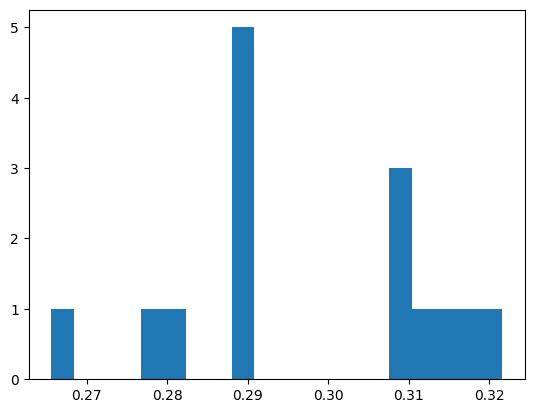

In [23]:
plt.hist(estimates_df['var_u'], bins=20)